In [2]:
from analysis.kalman_filter import MotionStructureKalmanFilter
def estimate(x, t, structure, σ_R=0):
    n, n_z = 3, 8
    ℓ = 0
    f = MotionStructureKalmanFilter(structure, x[0], σ_R)
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        f.predict(dt)
        ℓ += f.update(x[i][:n])
    return ℓ

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


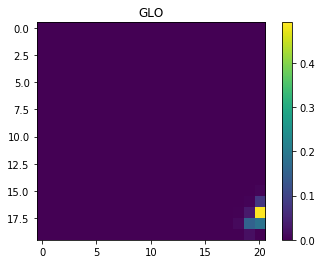

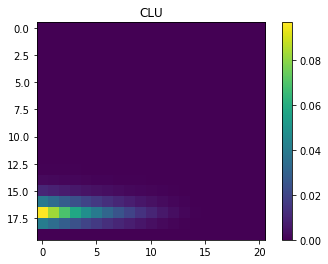

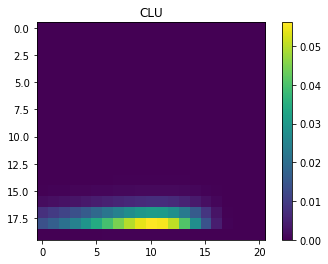

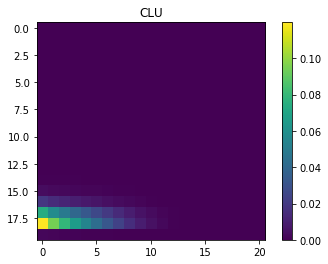

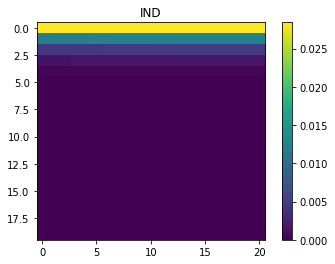

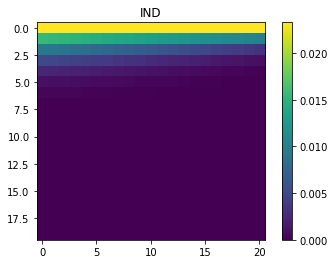

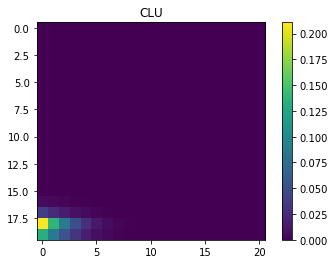

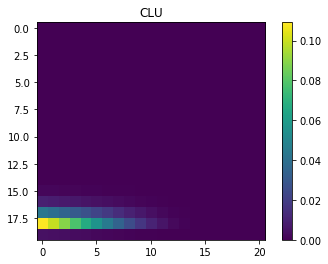

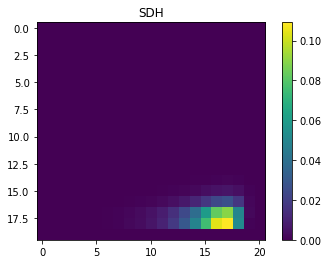

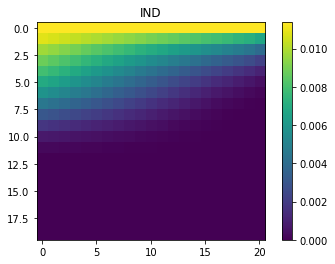

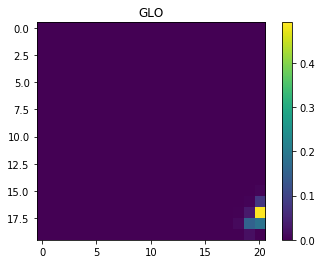

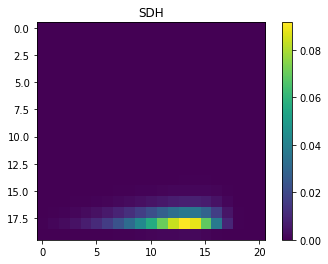

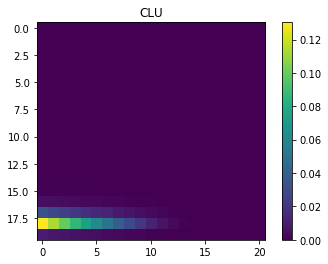

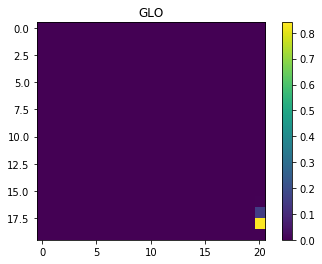

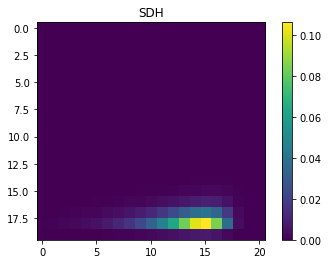

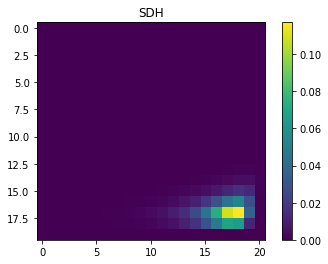

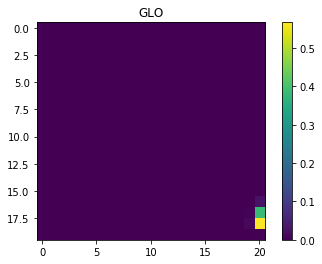

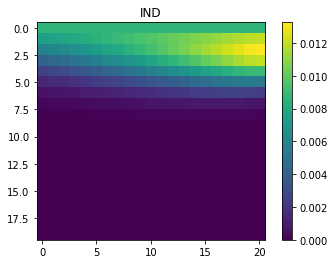

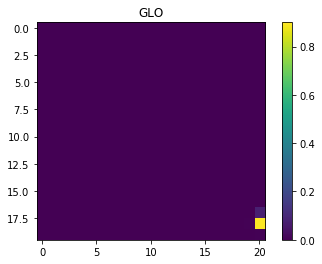

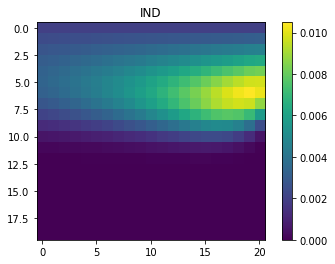

In [54]:
from utils.data import load_data
from stimuli.motion_structure import MotionStructure
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

σ_R = 0.1
cut = 20
data = load_data('../data/sichao/pilot_sichao.dat')[:cut]
n_glo, n_λ_I = 20, 20
d_glo, d_λ_I = 1 / n_glo, 2 / n_λ_I
ℓ = np.zeros((n_λ_I, n_glo + 1))

for i in range(cut):
    trial = data[i]
    x, t = trial['phi'], trial['t']
    for glo in range(0, n_glo + 1):
        for λ_I in range(1, n_λ_I + 1):
            ℓ[n_λ_I - λ_I, glo] = estimate(x, t, MotionStructure(glo * d_glo, λ_I * d_λ_I), σ_R)
    normalizer = logsumexp(ℓ.flatten())
    ℓ = np.exp(ℓ - normalizer)
    fig, ax = plt.subplots()
    ax.set_title(trial['answer'])
    im = ax.imshow(ℓ)
    fig.colorbar(im)
    plt.show()

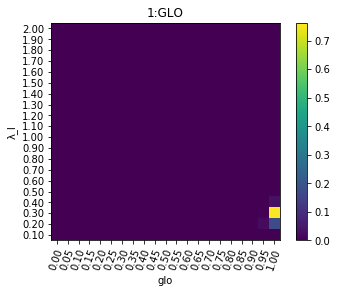

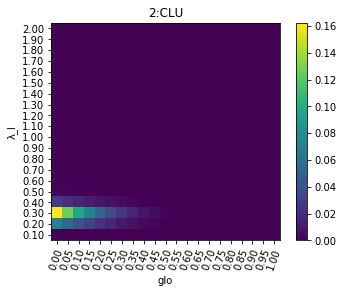

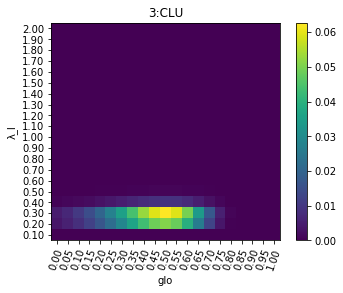

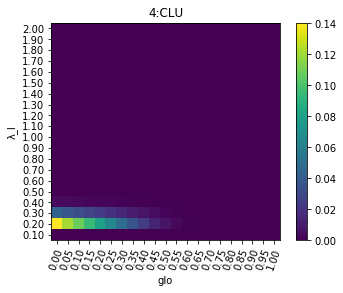

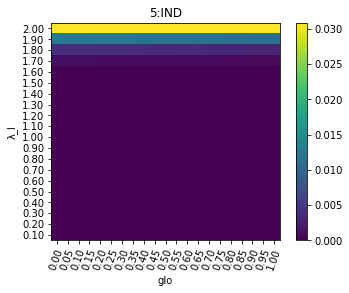

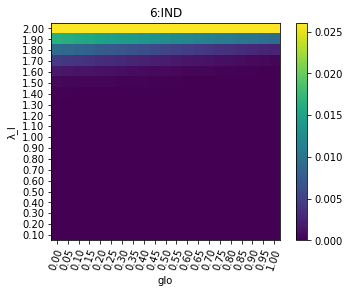

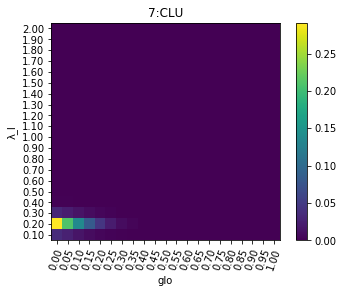

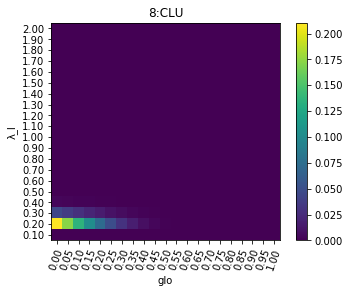

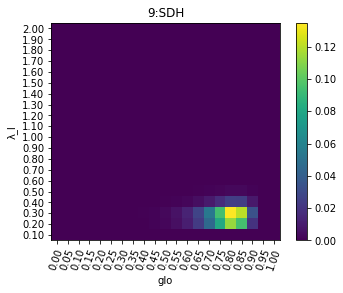

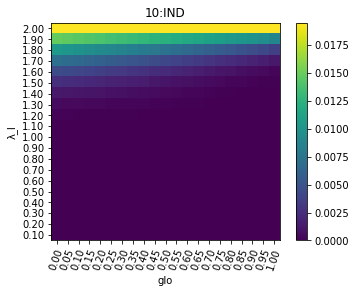

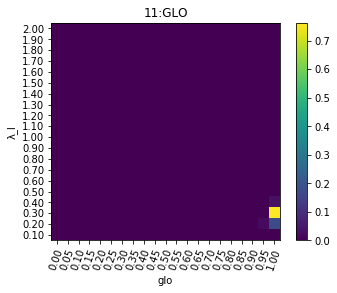

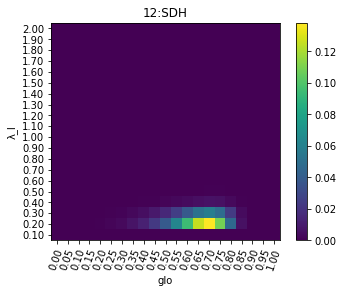

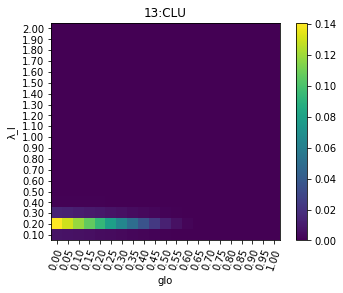

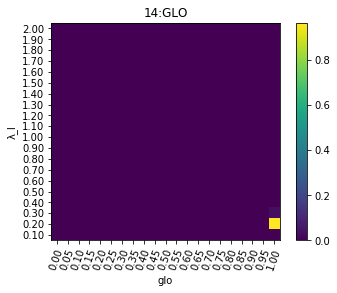

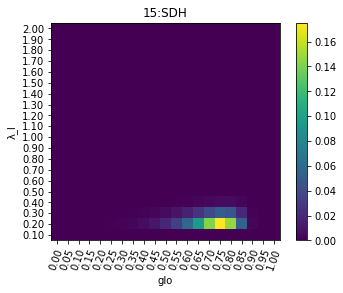

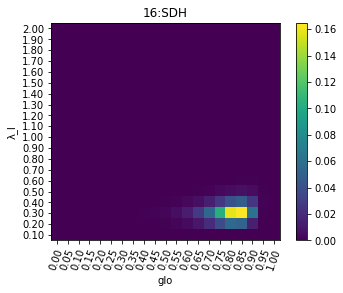

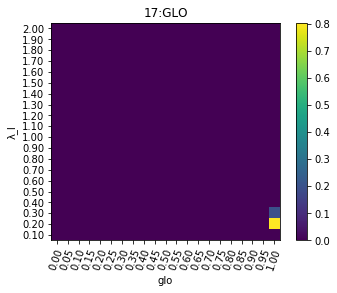

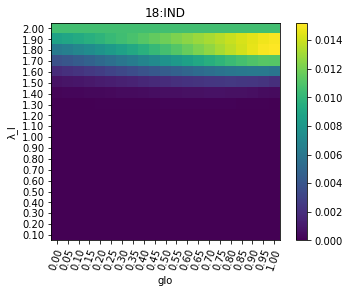

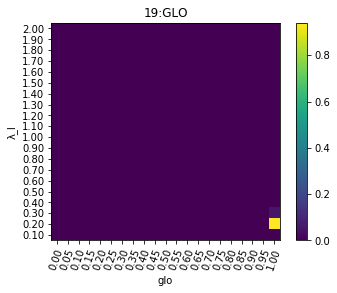

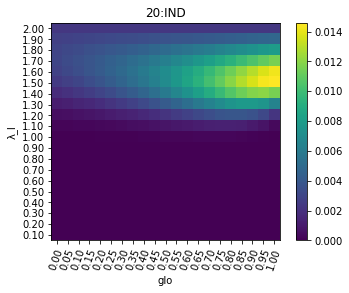

In [71]:
from utils.data import load_data
from stimuli.motion_structure import MotionStructure
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

σ_R = 0.04
cut = 20
data = load_data('../data/sichao/pilot_sichao.dat')[:cut]
n_glo, n_λ_I = 20, 20
d_glo, d_λ_I = 1 / n_glo, 2 / n_λ_I
ℓ = np.zeros((n_λ_I, n_glo + 1))
eps = 1e-3

for i in range(cut):
    trial = data[i]
    x, t = trial['phi'], trial['t']
    for glo in range(0, n_glo + 1):
        for λ_I in range(1, n_λ_I + 1):
            ℓ[n_λ_I - λ_I, glo] = estimate(x, t, MotionStructure(glo * d_glo, λ_I * d_λ_I), σ_R)
    normalizer = logsumexp(ℓ.flatten())
    ℓ = np.exp(ℓ - normalizer)
    fig, ax = plt.subplots()
    ax.set_title(f"{i+1}:{trial['answer']}")
    im = ax.imshow(ℓ)
    fig.colorbar(im)
    plt.xlabel('glo')
    plt.ylabel('λ_I')
    plt.xticks(range(0, n_glo + 1), [f'{t:.2f}' for t in np.arange(0, 1 + eps, d_glo)])
    plt.yticks(range(0, n_λ_I), [f'{t:.2f}' for t in np.arange(2, d_λ_I - eps, -d_λ_I)])
    plt.xticks(rotation=70)
    plt.show()